### Packages and Imports

In [1]:
import torch
import pandas as pd
import numpy as np

from datetime import datetime
from matplotlib import pyplot as plt

from utils.instruments import Stock, RiskFactor
from utils.data_handler import YahooDataHandler
from models.ar import AR
from models.garch import GARCH

%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])

### Financial Data

In [2]:
ydh = YahooDataHandler()

ticker = "GS"

# Start and end dates.
start = datetime.strptime("2005-05-01", r"%Y-%m-%d")
end = datetime.strptime("2023-06-01", r"%Y-%m-%d")

price_history = ydh.get_price_history(ticker, start, end)
identifier = f"{ticker}_RF"
risk_factor = RiskFactor(identifier, price_history)
stock = Stock(identifier=ticker, risk_factors=[risk_factor])

data = risk_factor.price_history.log_returns

[*********************100%***********************]  1 of 1 completed


In [3]:
ar_model = AR(data)
ar_model.calibrate()
print(ar_model.parameters)

[-0.05507386475801468, 0.003895561210811138, 0.0003181592037435621, 0.022512588649988174]


(array([2.00e+00, 9.00e+00, 2.20e+01, 1.87e+02, 3.32e+03, 9.59e+02,
        3.90e+01, 6.00e+00, 5.00e+00, 2.00e+00]),
 array([-0.21022317, -0.16571908, -0.12121498, -0.07671089, -0.0322068 ,
         0.0122973 ,  0.05680139,  0.10130548,  0.14580958,  0.19031367,
         0.23481777]),
 <BarContainer object of 10 artists>)

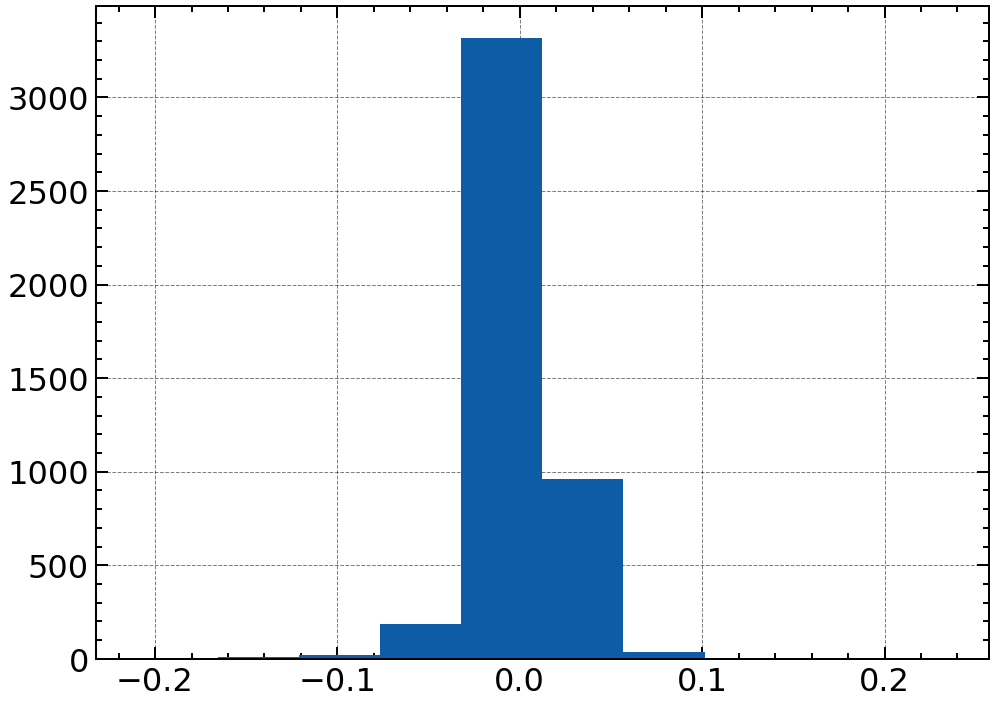

In [4]:
plt.hist(data)

In [5]:
ar_model.aic

tensor(-54072.6562)

In [6]:
ar_model.bic

tensor(-54046.9648)

inital vol 0.015797976404428482
long vol: 0.022507641464471817


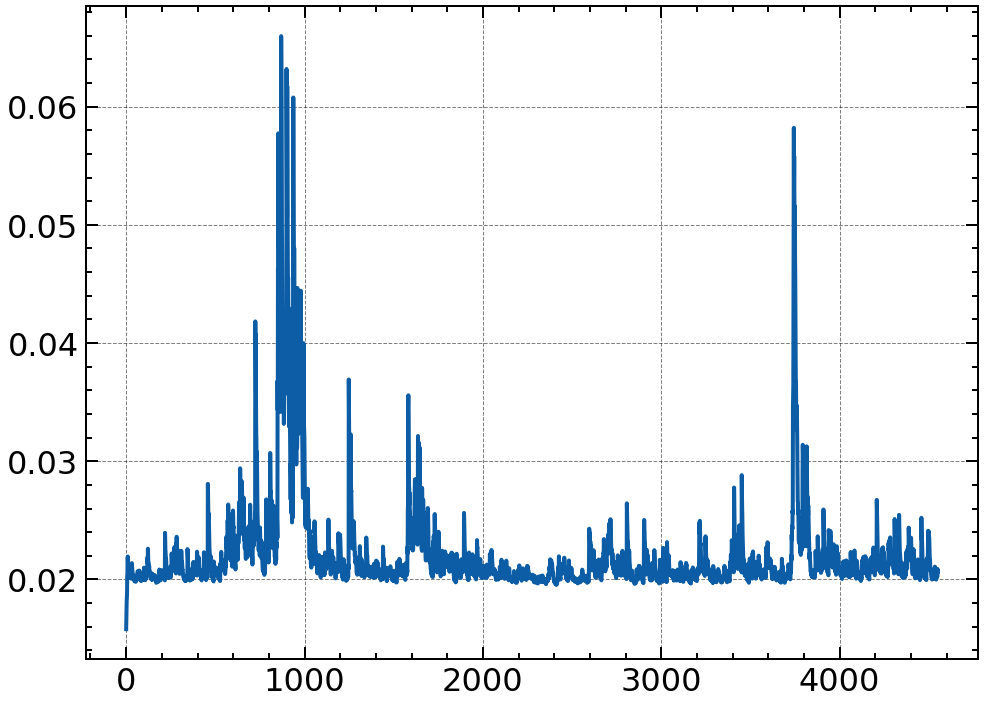

-31272.06882009749


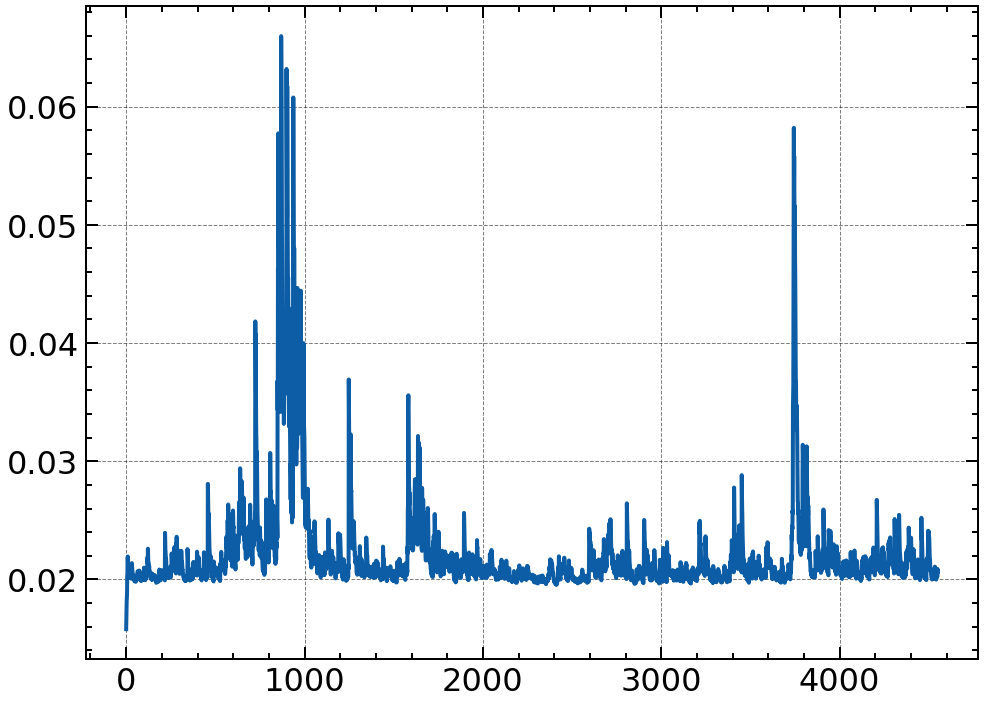

-31272.068825055445


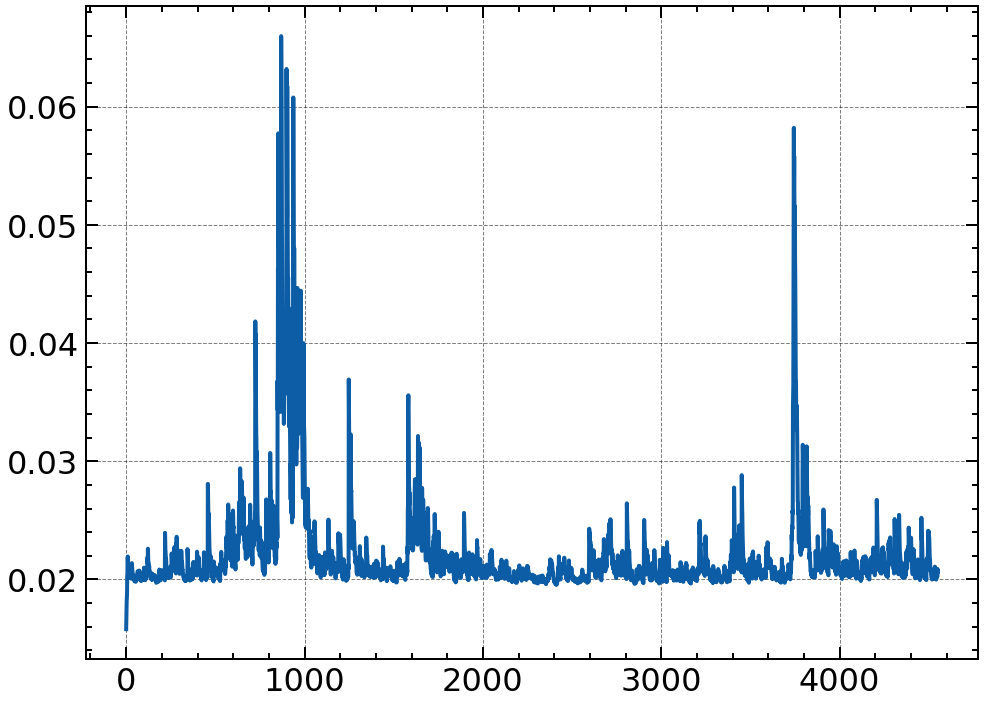

-31272.06881588443


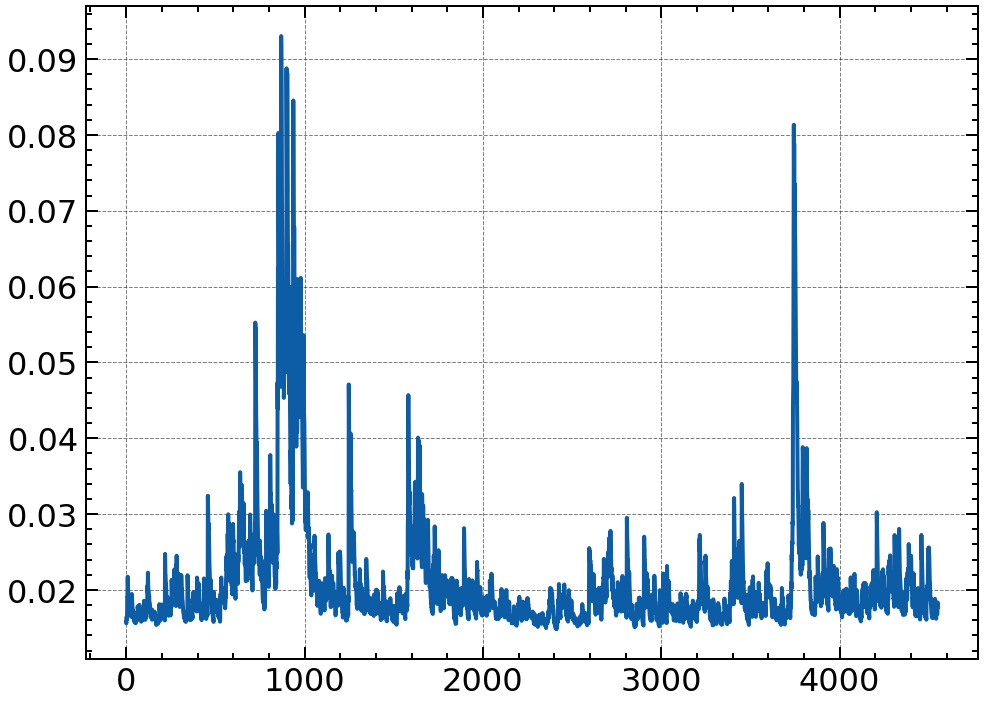

-31857.86726110155


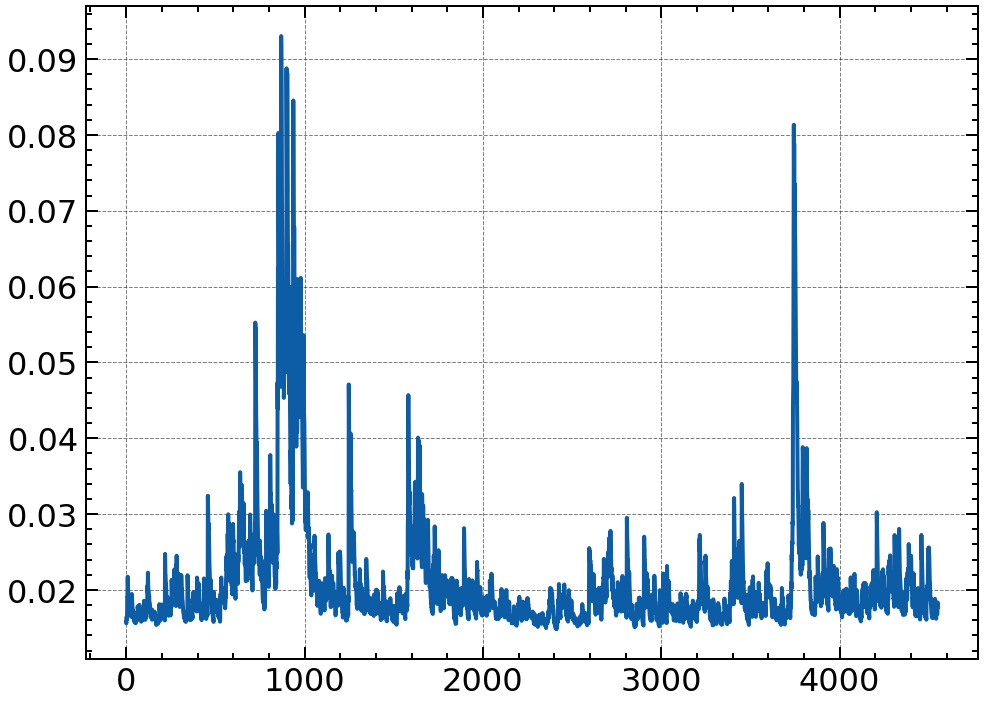

-31857.86726458814


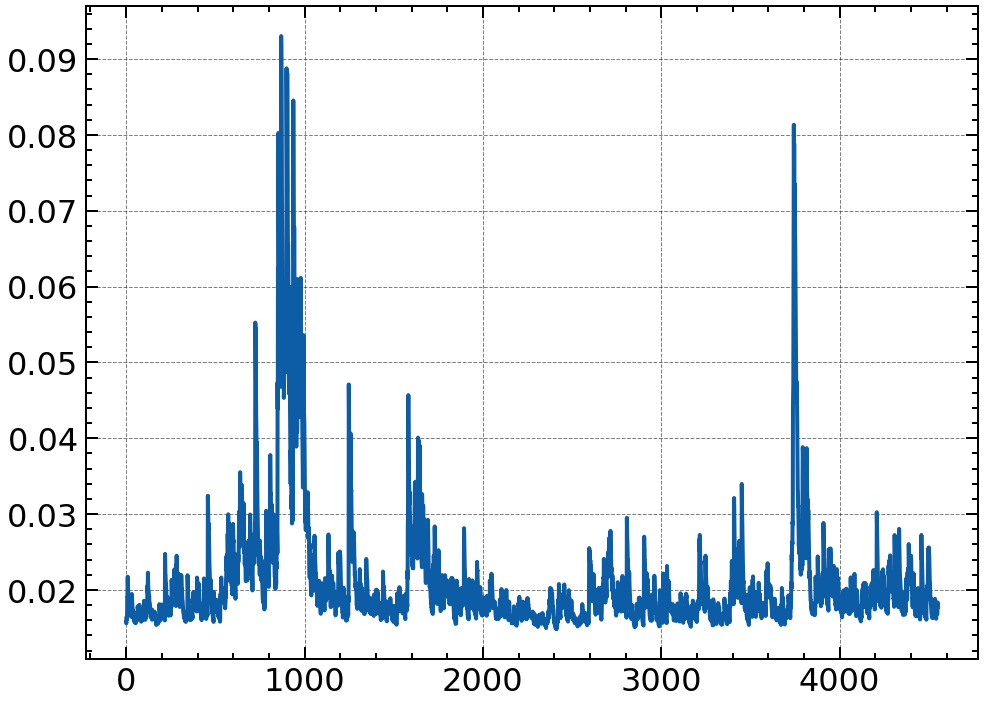

-31857.867258151862


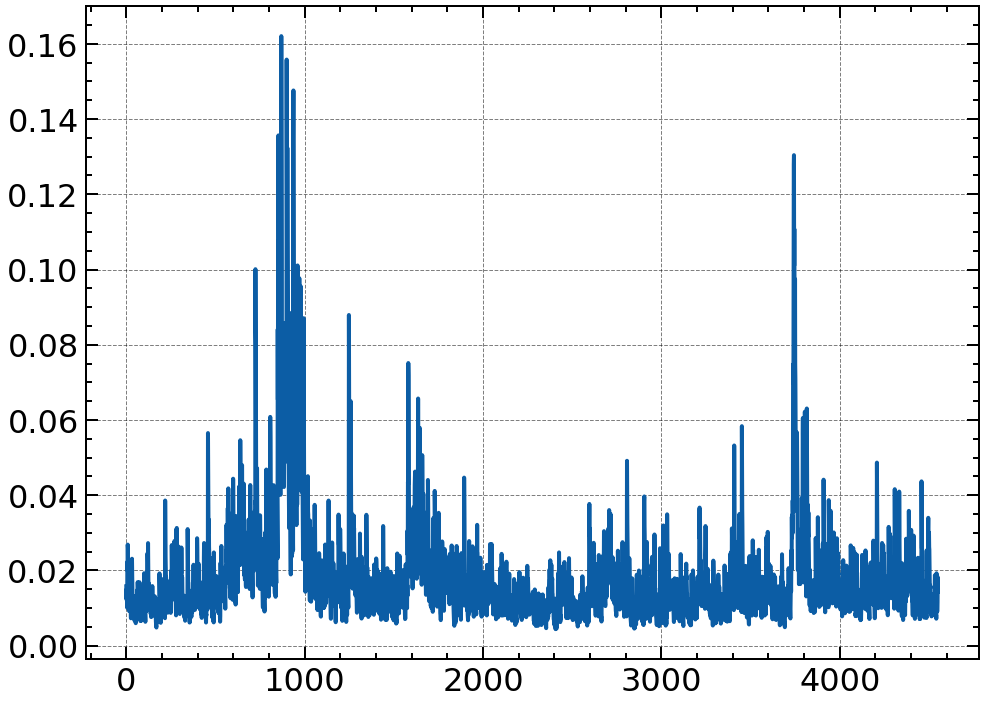

-30865.080227231556


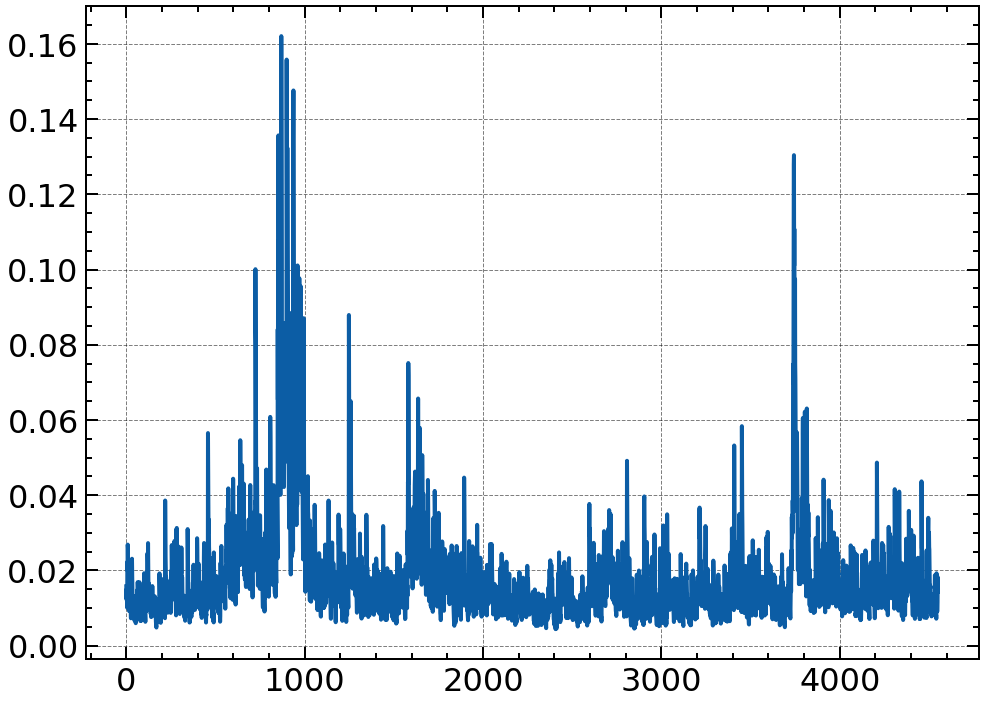

-30865.080222558172


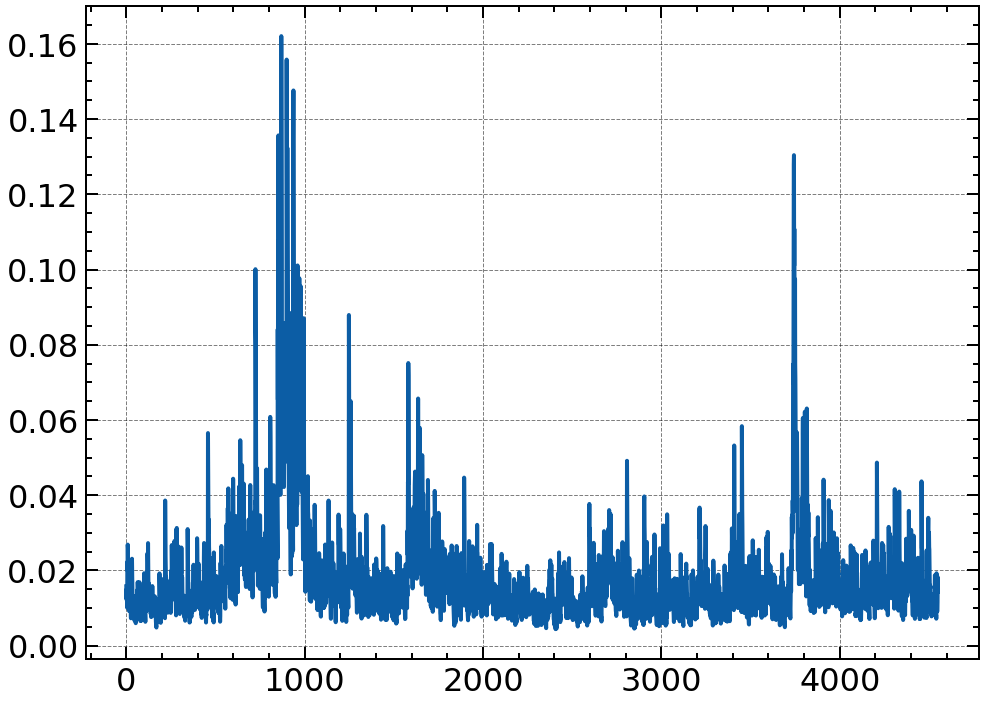

-30865.080248346247


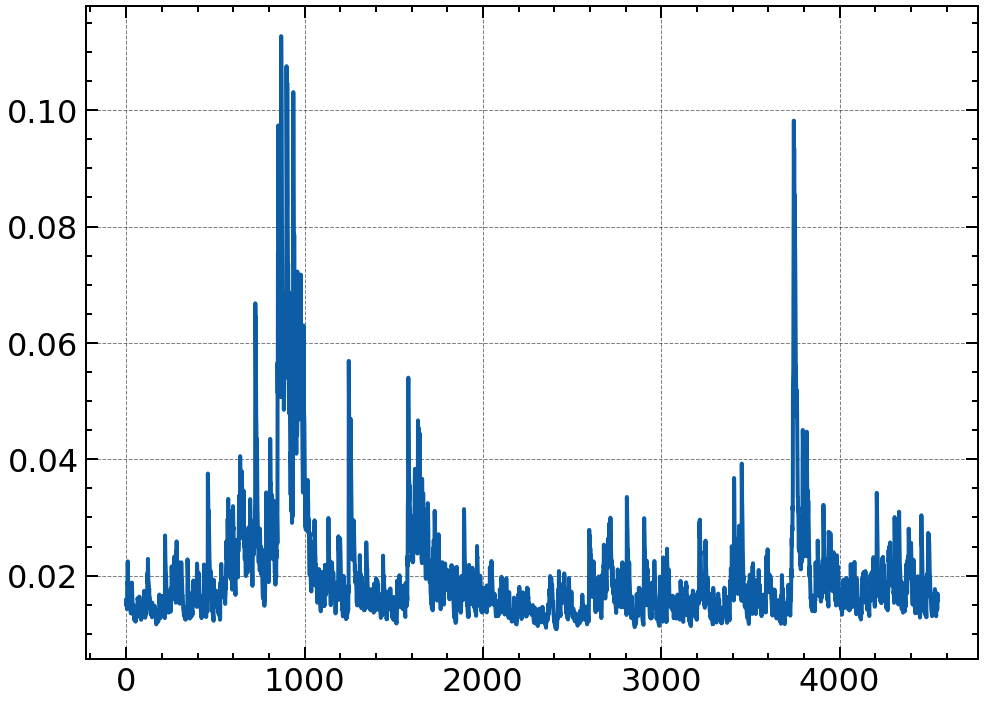

-32044.99747468101


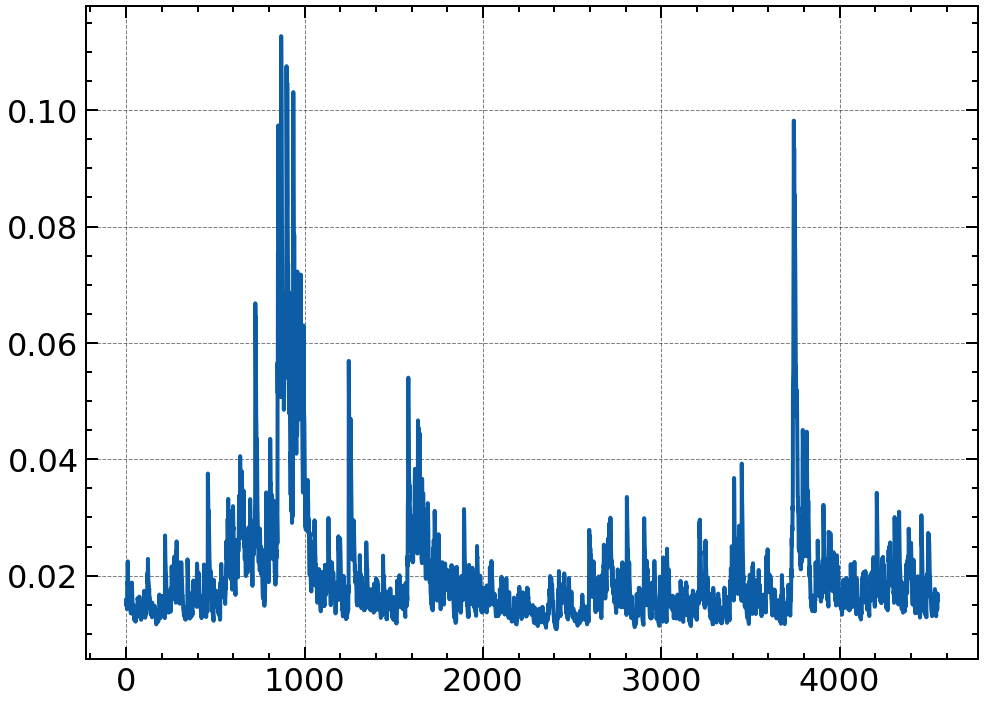

-32044.99747547271


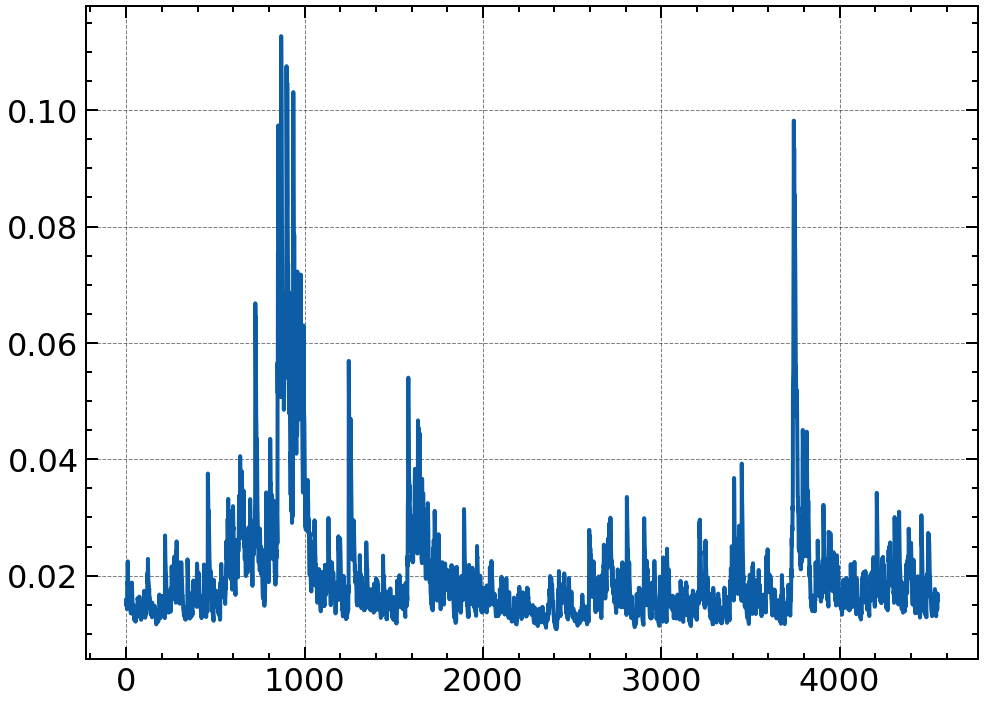

-32044.997475052944


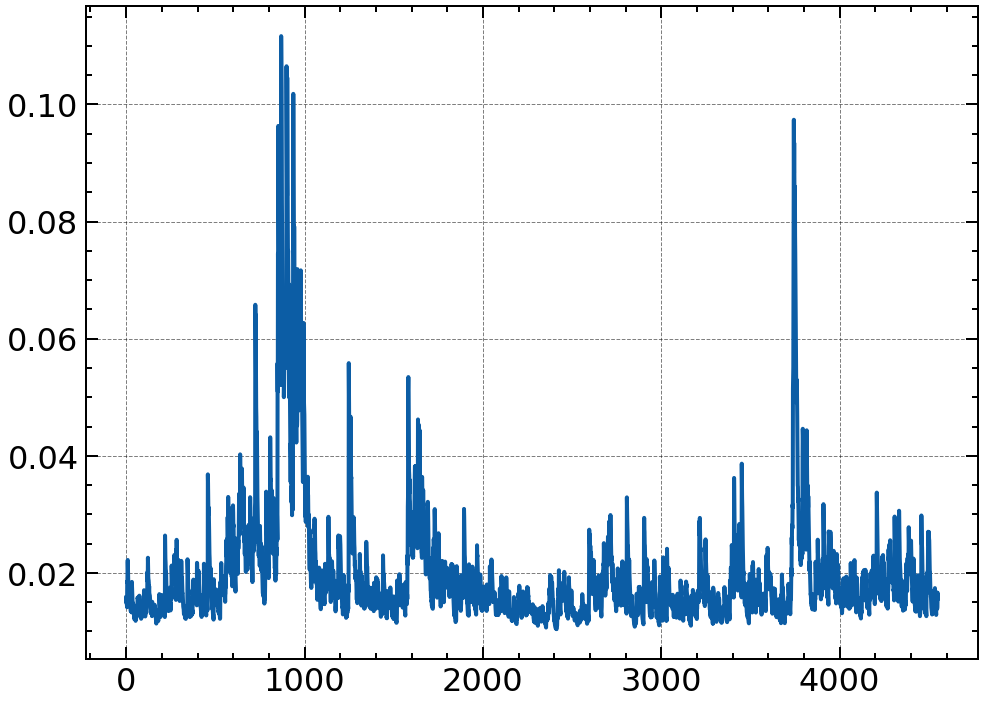

-32057.6156986228


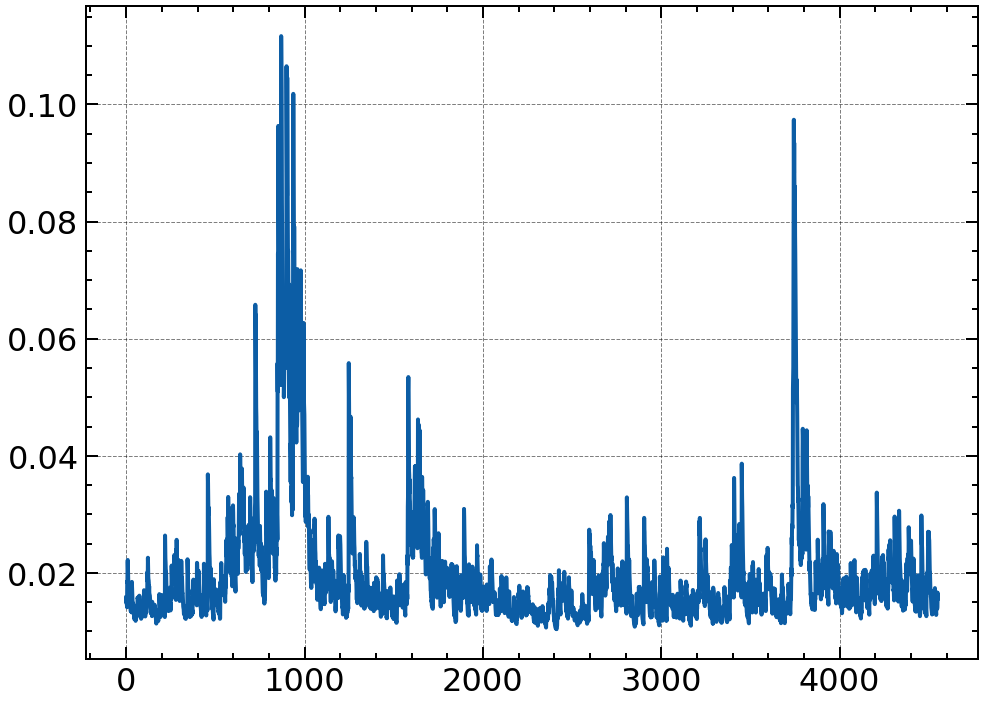

-32057.615699131158


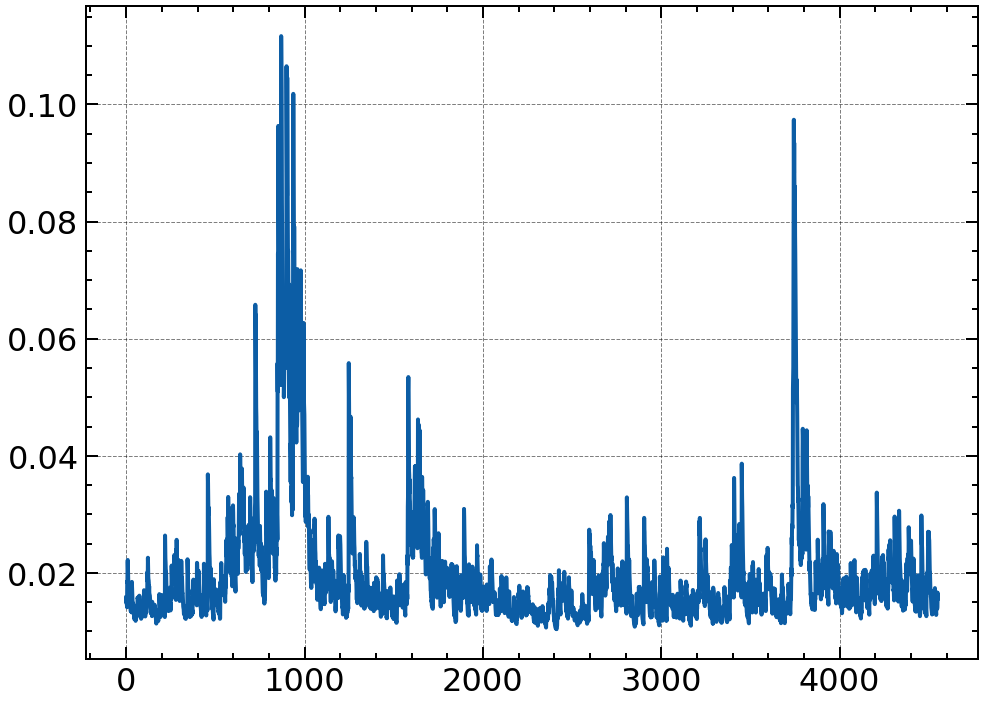

-32057.61569919901


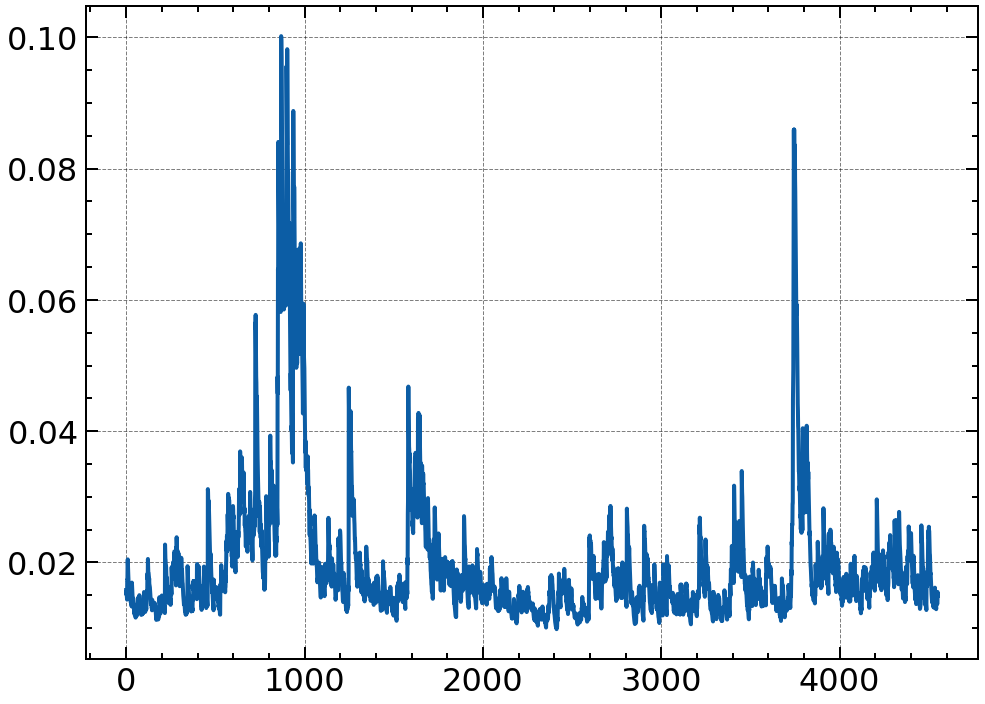

-32095.999486043987


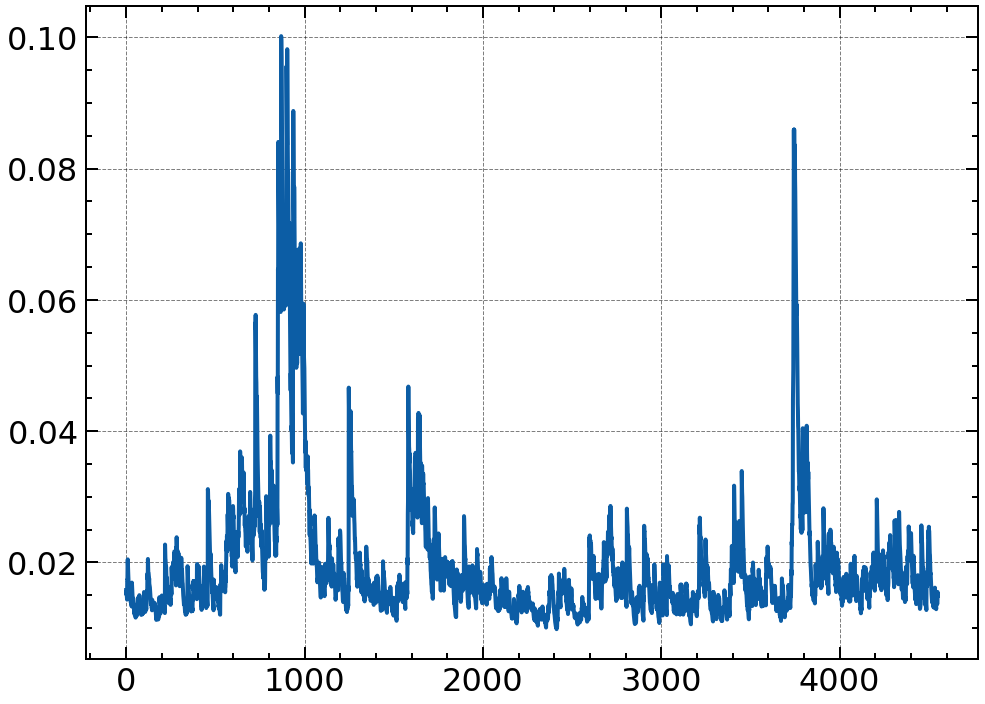

-32095.999486187487


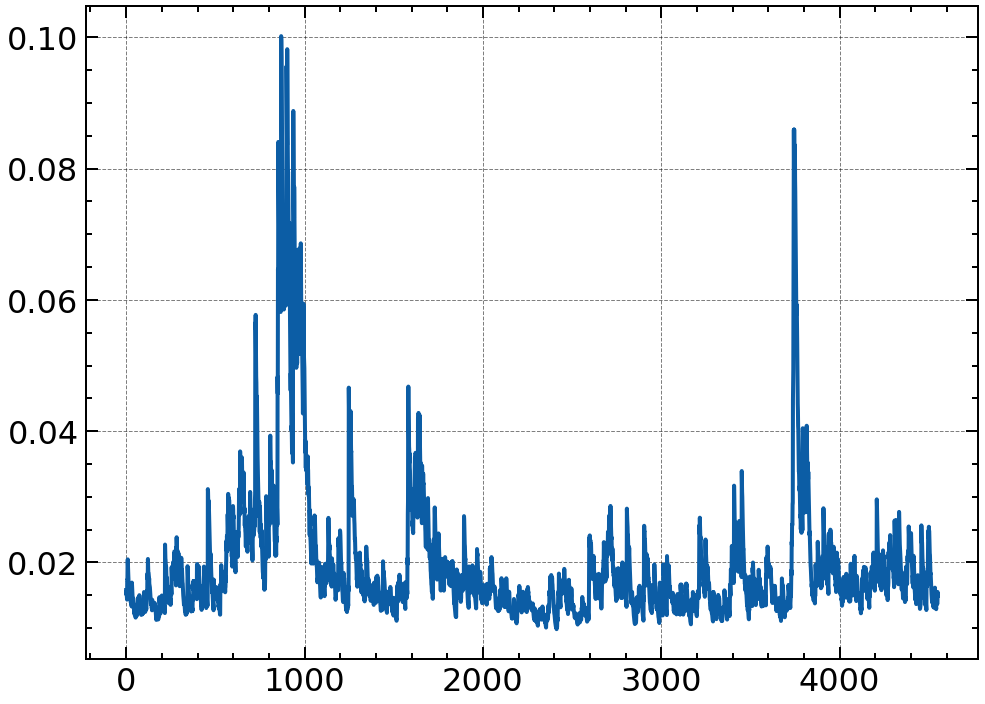

-32095.999486265726


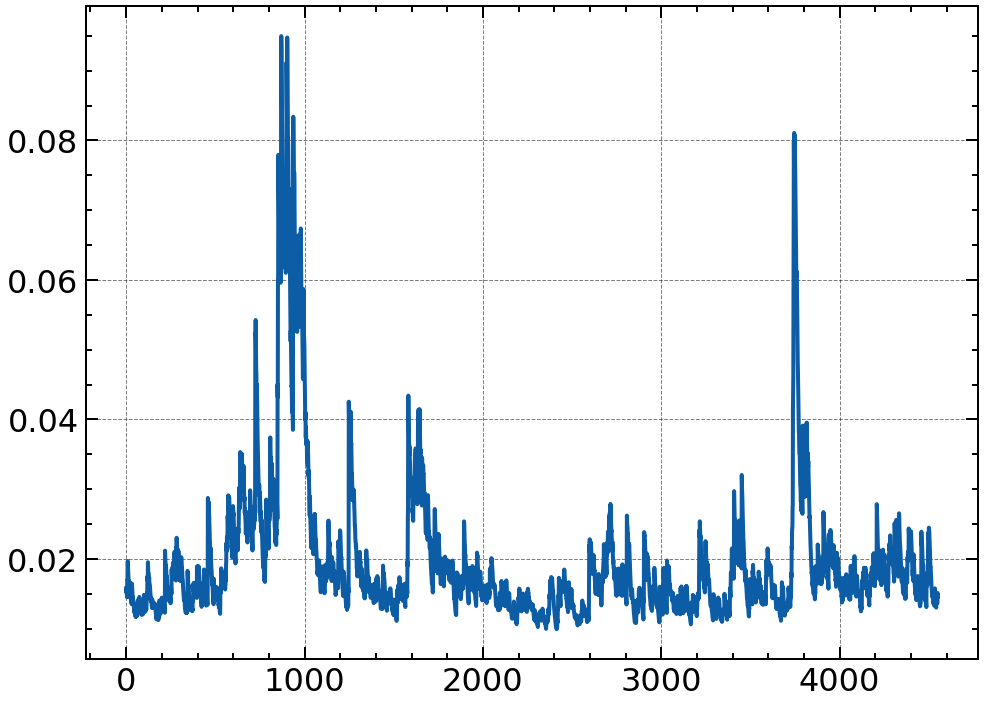

-32101.887060753583


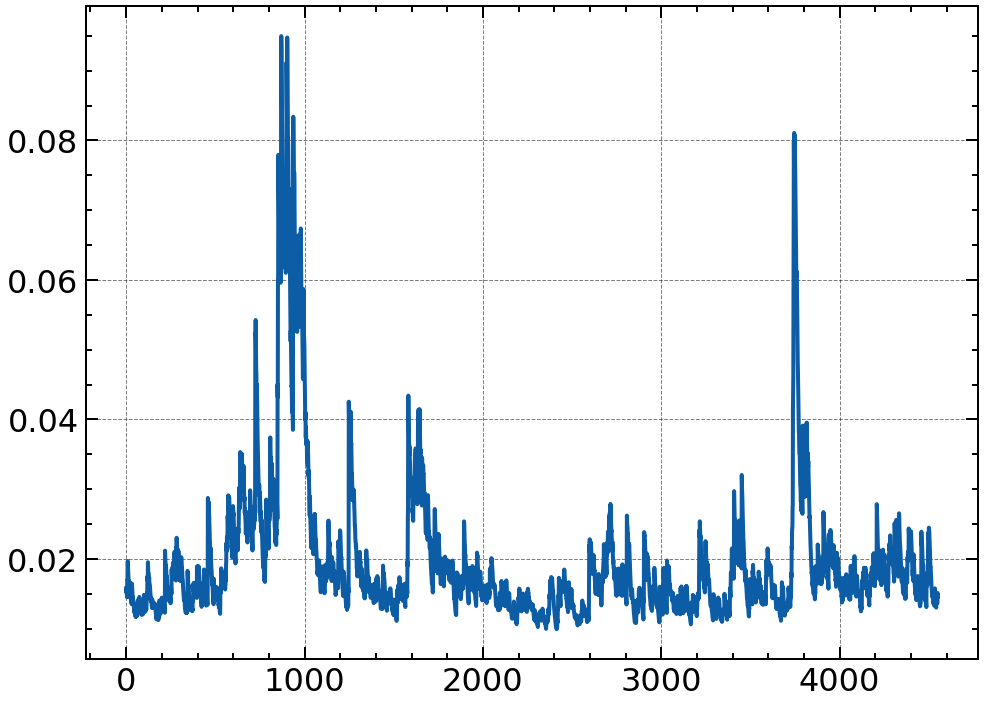

-32101.88706083072


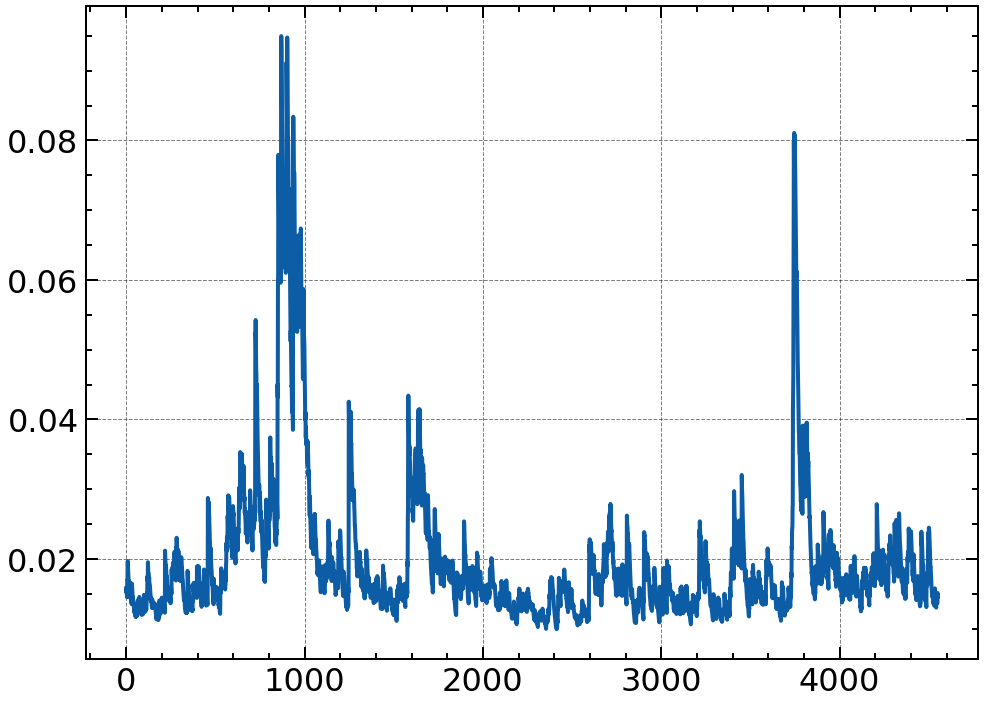

-32101.887060745026


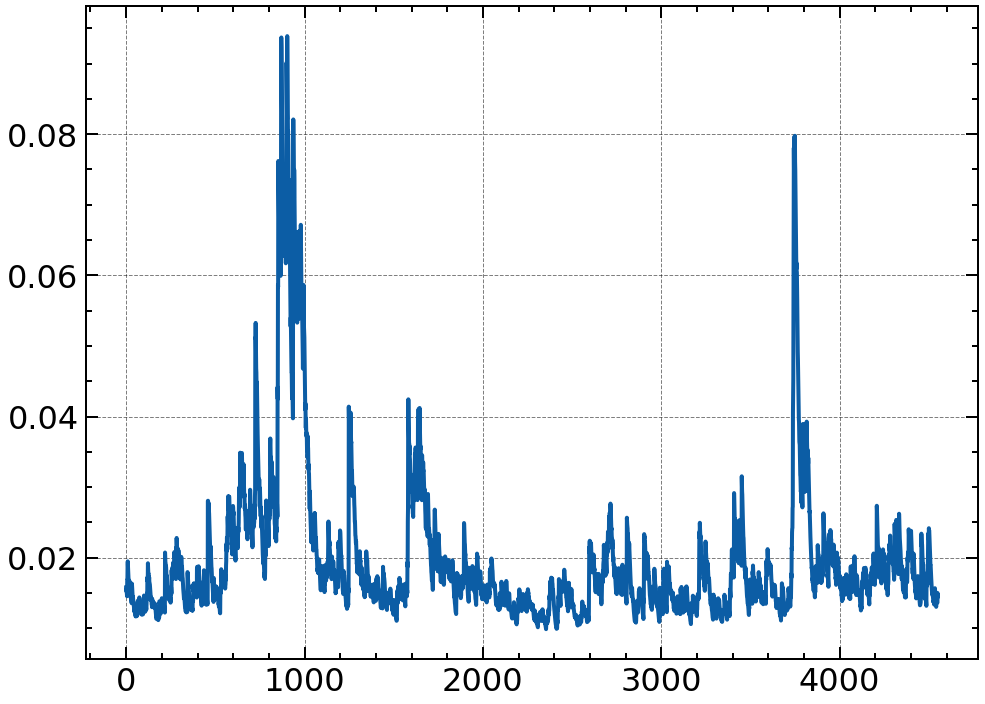

-32102.409885135134


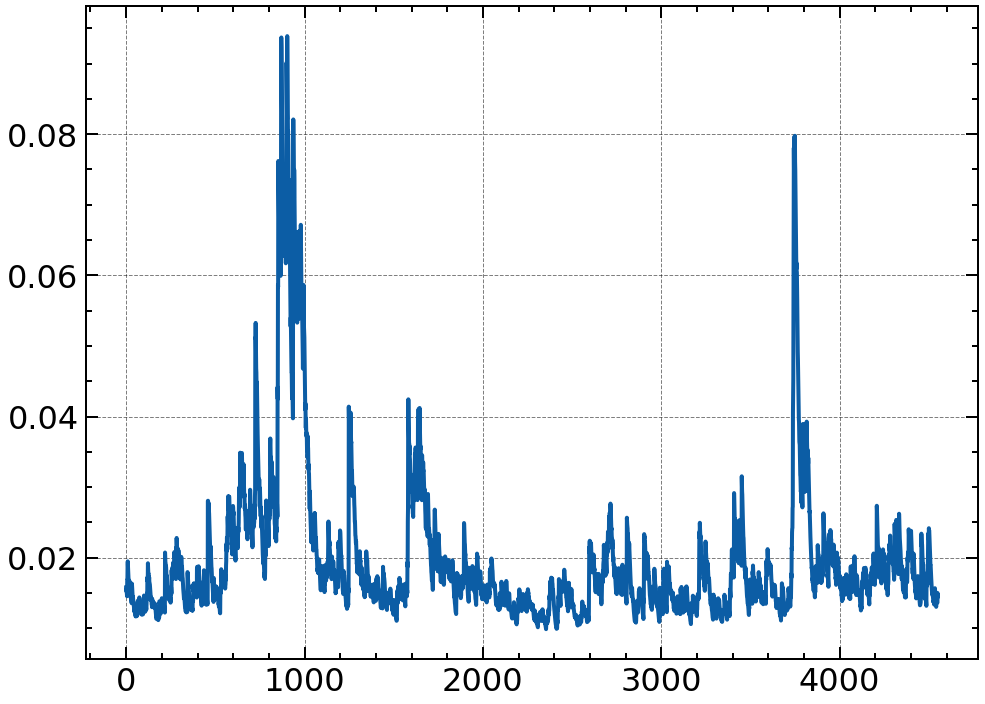

-32102.409885157205


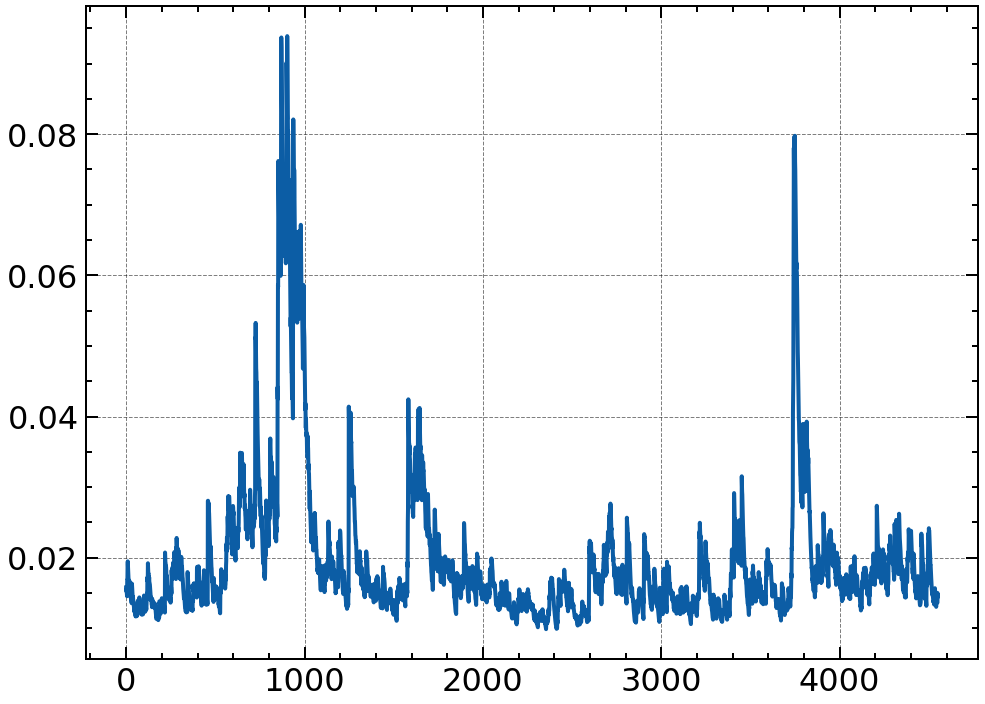

-32102.409885109217


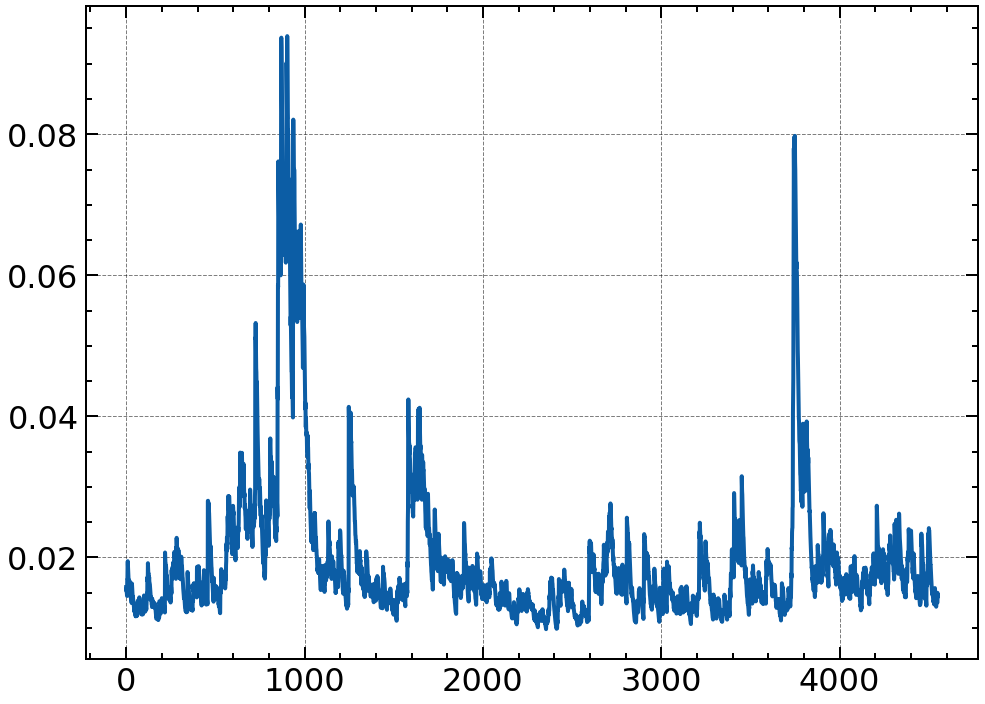

-32102.429889133677


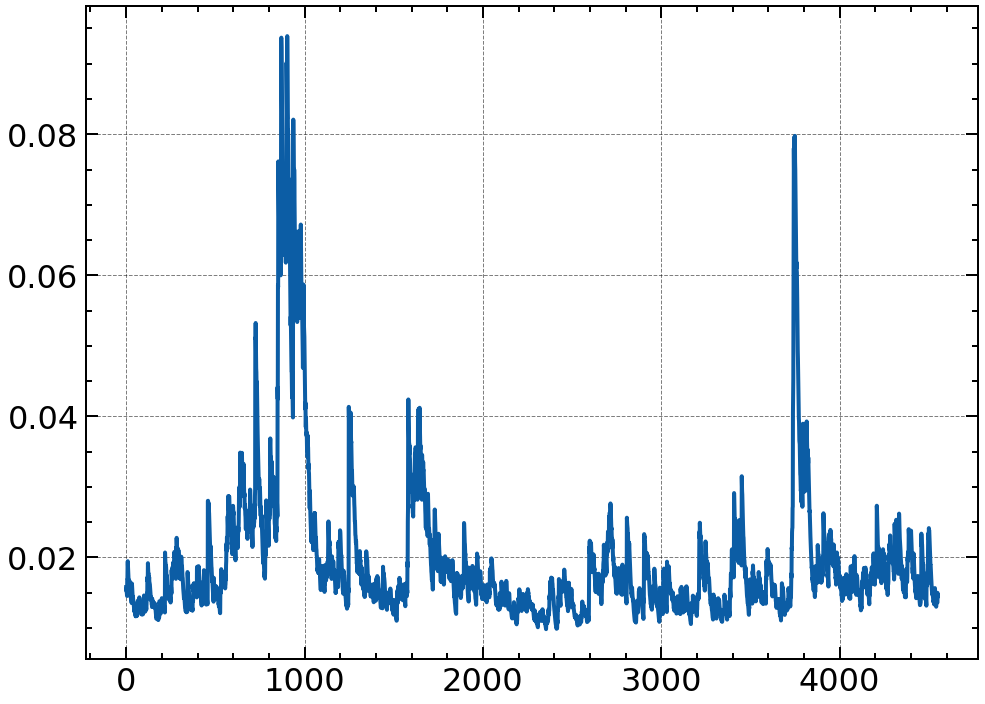

-32102.429889134328


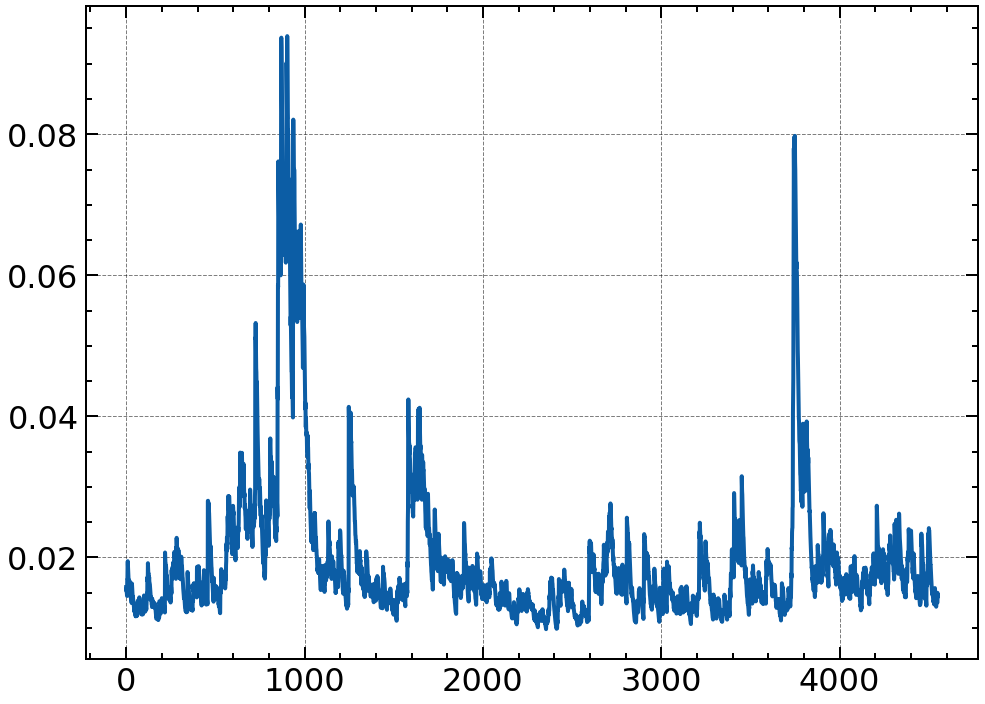

-32102.429889133957


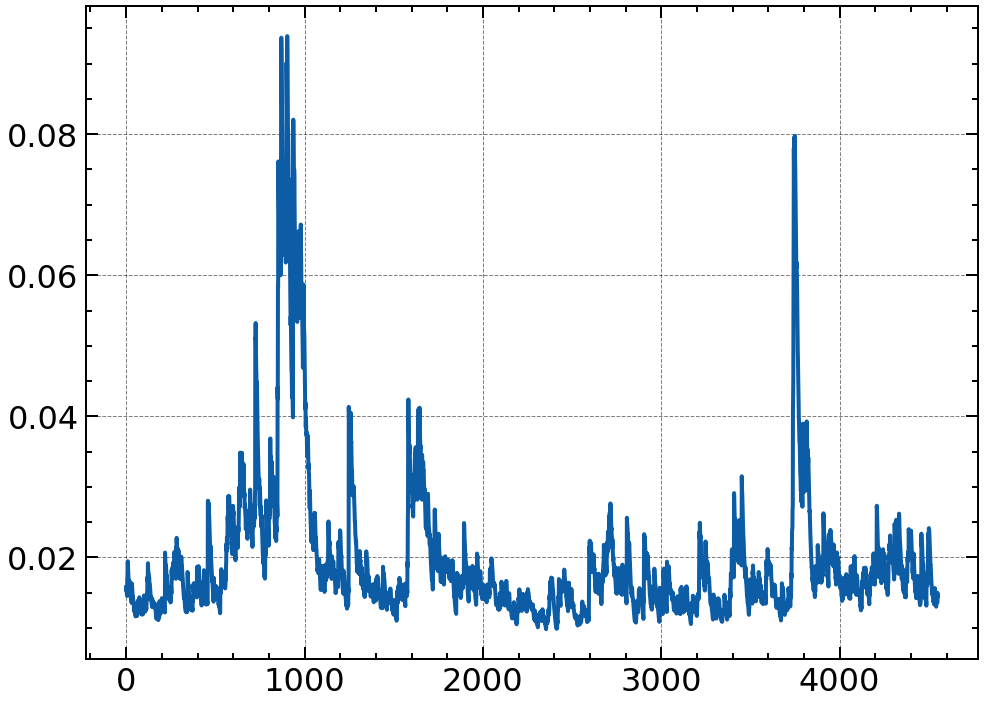

-32102.429954543793


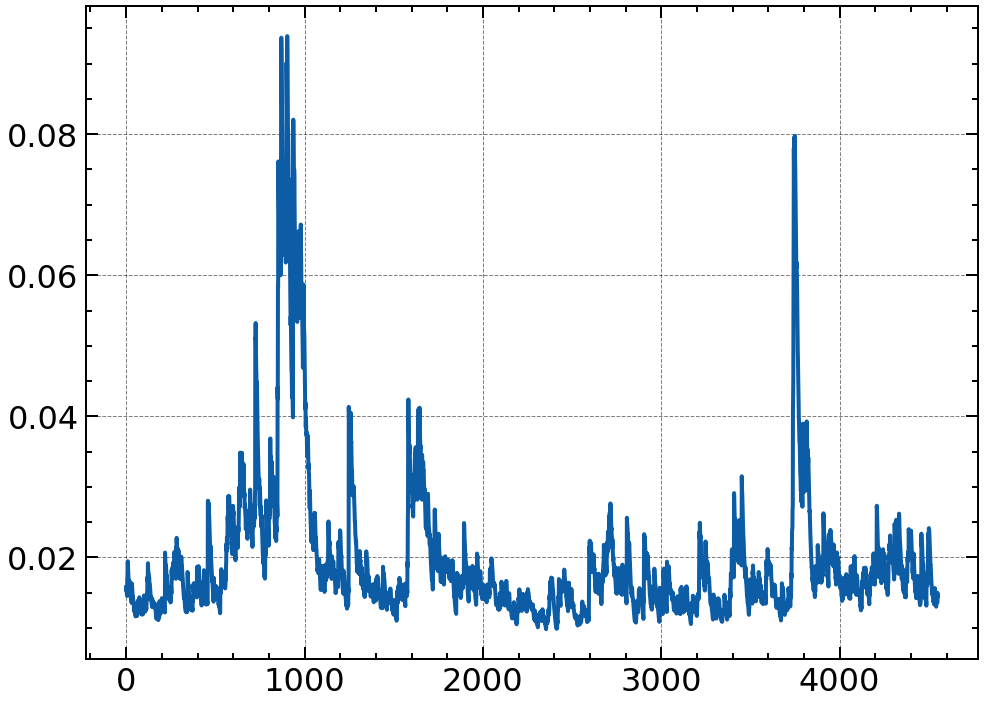

-32102.429954543783


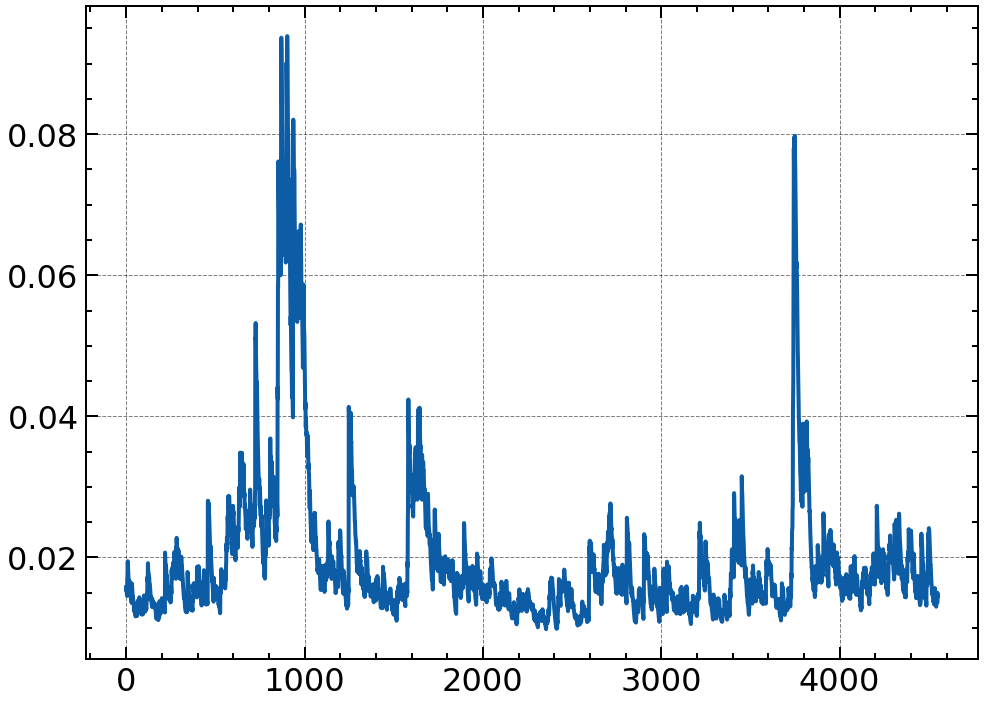

-32102.42995454397


In [7]:
garch_model = GARCH(data)
garch_model.calibrate()

In [8]:
parameters = garch_model._solution.x
parameters = garch_model._uncondition_parameters(parameters)
parameters

array([0.07986172, 0.90859617])

In [9]:
garch_model._solution

      fun: -32102.429954543793
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00109139, -0.0178261 ])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 30
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([4.45595378, 2.47402251])

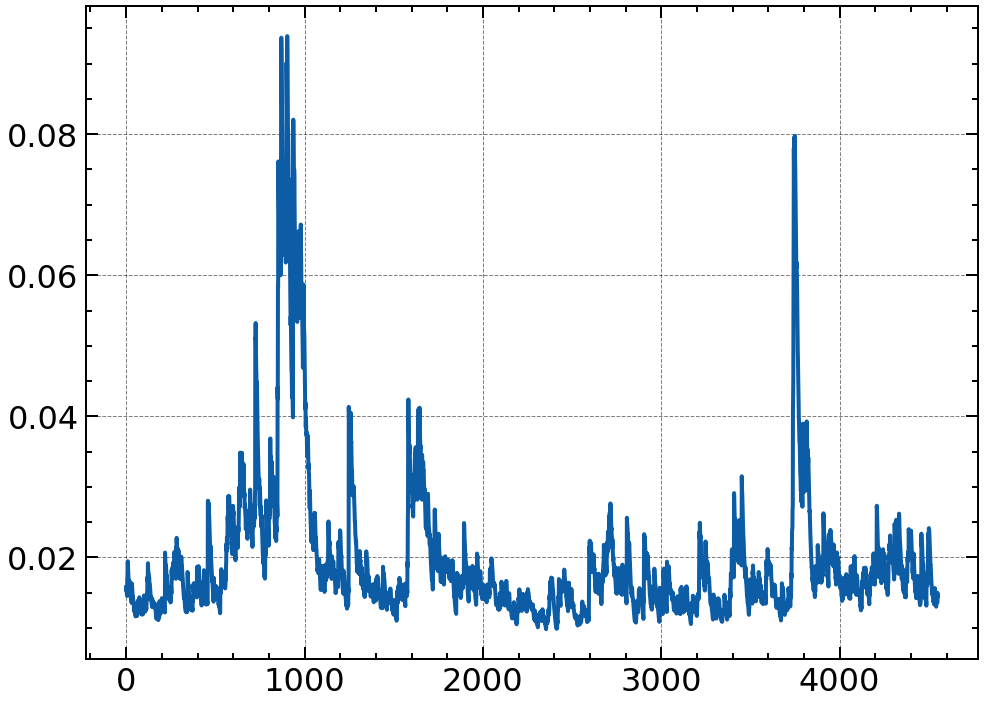

array([0.00024958, 0.00023267, 0.00024324, ..., 0.00018592, 0.00022386,
       0.00021026])

In [10]:
garch_model._compute_variance(garch_model._solution.x)